<a href="https://colab.research.google.com/github/talha-jobaer/210118_KNN-Practice/blob/main/210118_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/talha-jobaer/KNN_practice/main/data.csv"

DRIVE_PATH = "/content/drive/MyDrive/data.csv"



In [ ]:

import pandas as pd
import os

df = None
if GITHUB_RAW_URL:
    try:
        df = pd.read_csv( "https://raw.githubusercontent.com/talha-jobaer/KNN_practice/main/data.csv")
        print("Loaded dataset from GitHub raw URL.")
    except Exception as e:
        print("Failed to load from GitHub URL:", e)

if df is None:

    from google.colab import drive
    drive.mount('/content/drive')
    if os.path.exists(DRIVE_PATH):
        df = pd.read_csv(DRIVE_PATH)
        print("Loaded dataset from Google Drive.")
    else:
        raise FileNotFoundError(f"Could not find file at GitHub or Drive. Please verify GITHUB_RAW_URL or DRIVE_PATH: {DRIVE_PATH}")

print("Shape:", df.shape)
df.head()


Loaded dataset from GitHub raw URL.
Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nNull counts:\n", df.isnull().sum())
print("\nValue counts for possible target columns (diagnosis/Outcome):")
for c in ['diagnosis','Diagnosis','Outcome','target','label']:
    if c in df.columns:
        print(f"\n{c}:\n", df[c].value_counts(dropna=False))

display(df.describe().T)


Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dtypes:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimensio

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:

df.columns = [c.strip() for c in df.columns]

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

possible_targets = ['diagnosis','Diagnosis','Outcome','target','label','class','Class']
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break

if target_col is None:

    raise ValueError("Could not find a target column automatically. Rename the target column to 'diagnosis' or 'Outcome' and re-run.")

print("Detected target column:", target_col)

# Map 'M'/'B' to 1/0 (Breast cancer dataset)
if df[target_col].dtype == object:
    if set(df[target_col].unique()) >= {"M","B"}:
        df[target_col] = df[target_col].map({"M":1,"B":0})
        print("Mapped M/B to 1/0")

# Drop any ID column if present
for id_col in ['id','ID','Id']:
    if id_col in df.columns:
        df = df.drop(columns=[id_col])
        print(f"Dropped column: {id_col}")

print("Final columns:", df.columns.tolist())


Detected target column: diagnosis
Mapped M/B to 1/0
Dropped column: id
Final columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=[target_col])
y = df[target_col]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


Train: (398, 30) Validation: (85, 30) Test: (86, 30)


In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_num = X_train[num_cols].copy()
X_val_num   = X_val[num_cols].copy()
X_test_num  = X_test[num_cols].copy()

X_train_num_imp = pd.DataFrame(num_imputer.fit_transform(X_train_num), columns=num_cols, index=X_train_num.index)
X_val_num_imp   = pd.DataFrame(num_imputer.transform(X_val_num), columns=num_cols, index=X_val_num.index)
X_test_num_imp  = pd.DataFrame(num_imputer.transform(X_test_num), columns=num_cols, index=X_test_num.index)

# Scale
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num_imp), columns=num_cols, index=X_train_num_imp.index)
X_val_num_scaled   = pd.DataFrame(scaler.transform(X_val_num_imp), columns=num_cols, index=X_val_num_imp.index)
X_test_num_scaled  = pd.DataFrame(scaler.transform(X_test_num_imp), columns=num_cols, index=X_test_num_imp.index)

if cat_cols:
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
    ohe.fit(X_train[cat_cols])
    X_train_cat = pd.DataFrame(ohe.transform(X_train[cat_cols]), index=X_train.index, columns=ohe.get_feature_names_out(cat_cols))
    X_val_cat   = pd.DataFrame(ohe.transform(X_val[cat_cols]), index=X_val.index, columns=ohe.get_feature_names_out(cat_cols))
    X_test_cat  = pd.DataFrame(ohe.transform(X_test[cat_cols]), index=X_test.index, columns=ohe.get_feature_names_out(cat_cols))

    X_train_proc = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
    X_val_proc   = pd.concat([X_val_num_scaled, X_val_cat], axis=1)
    X_test_proc  = pd.concat([X_test_num_scaled, X_test_cat], axis=1)
else:
    X_train_proc = X_train_num_scaled
    X_val_proc   = X_val_num_scaled
    X_test_proc  = X_test_num_scaled

print("Processed shapes:", X_train_proc.shape, X_val_proc.shape, X_test_proc.shape)
display(X_train_proc.head())


Numeric cols: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical cols: []
Processed shapes: (398, 30) (85, 30) (86, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,1.705820,1.049745,2.121295,1.669337,2.276458,4.544295,3.539139,2.848393,4.032390,2.639773,...,1.459510,0.949589,1.868176,1.306840,1.335383,2.313855,2.346427,2.049399,3.944281,0.866554
330,0.536388,-0.909945,0.569095,0.390316,-0.065868,0.644945,0.393543,0.557002,-0.116781,-0.401530,...,0.508294,-0.645315,0.501917,0.330087,0.477013,1.242091,1.052574,1.255850,0.167978,0.405242
378,-0.131456,-0.993336,-0.148848,-0.211543,-0.916169,-0.508574,-0.567530,-0.606645,-0.079867,-0.512454,...,-0.362451,-1.028485,-0.280415,-0.399387,-0.196219,0.368661,-0.080795,-0.140014,0.741988,0.687521
213,0.928077,1.418055,0.925405,0.828546,0.329734,0.223748,0.983188,0.443947,-1.866520,-0.555982,...,0.365921,0.351910,0.386082,0.243539,-0.330866,-0.464721,0.030311,-0.072253,-2.040715,-0.861167
89,0.144699,-0.972488,0.158315,-0.009697,1.205760,0.585041,0.137701,0.562858,1.116158,0.117991,...,0.008957,-1.257732,0.059367,-0.140450,-0.187804,0.359126,-0.064176,0.376471,0.373873,0.047726


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train_proc, y_train)

y_val_pred = knn.predict(X_val_proc)
y_val_prob = knn.predict_proba(X_val_proc)[:,1]

print("Baseline KNN (k=5) on Validation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1:", f1_score(y_val, y_val_pred))
print("AUC (val):", roc_auc_score(y_val, y_val_prob))


Baseline KNN (k=5) on Validation:
Accuracy: 0.9647058823529412
Precision: 1.0
Recall: 0.90625
F1: 0.9508196721311475
AUC (val): 0.9778891509433963


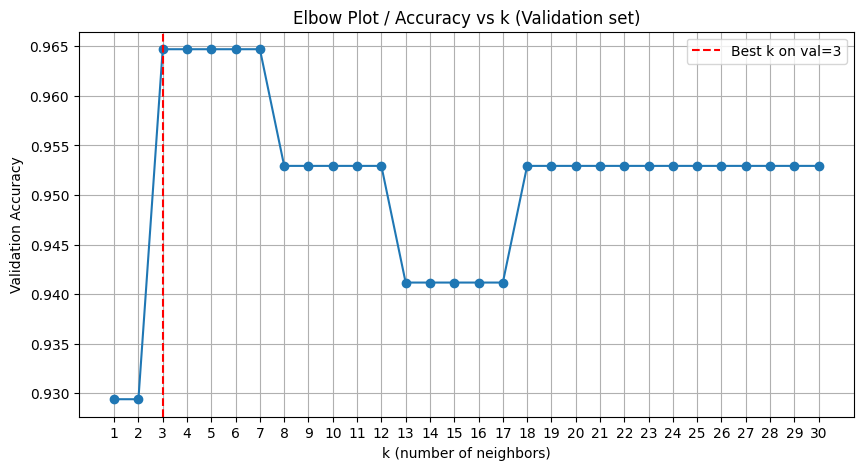

Best k on validation: 3 with accuracy 0.9647058823529412


In [ ]:
import matplotlib.pyplot as plt
k_values = list(range(1,31))
val_scores = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski')
    m.fit(X_train_proc, y_train)
    val_scores.append(accuracy_score(y_val, m.predict(X_val_proc)))

plt.figure(figsize=(10,5))
plt.plot(k_values, val_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Validation Accuracy')
plt.title('Elbow Plot / Accuracy vs k (Validation set)')
best_k = k_values[int(pd.Series(val_scores).idxmax())]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k on val={best_k}')
plt.legend()
plt.grid(True)
plt.show()
print("Best k on validation:", best_k, "with accuracy", max(val_scores))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3,5,7,9,11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
    'knn__p': [2,1]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best params (from GridSearch on TRAIN):", grid.best_params_)
print("Best CV AUC:", grid.best_score_)
best_grid = grid.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params (from GridSearch on TRAIN): {'knn__metric': 'minkowski', 'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV AUC: 0.9891632183908046


In [ ]:
y_val_pred_best = best_grid.predict(X_val)
y_val_prob_best = best_grid.predict_proba(X_val)[:,1]
from sklearn.metrics import classification_report
print("Validation Metrics (best_grid):")
print(classification_report(y_val, y_val_pred_best))
print("AUC (val):", roc_auc_score(y_val, y_val_prob_best))

import numpy as np
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

best_params = grid.best_params_
final_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(**{k.split('__')[-1]: v for k,v in best_params.items() if k.startswith('knn__')}))
])
final_pipe.fit(X_trainval, y_trainval)

y_test_pred = final_pipe.predict(X_test)
y_test_prob = final_pipe.predict_proba(X_test)[:,1]

print("Final Test Metrics (after refit on Train+Val):")
print(classification_report(y_test, y_test_pred))
print("AUC (test):", roc_auc_score(y_test, y_test_prob))


Validation Metrics (best_grid):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.97      0.91      0.94        32

    accuracy                           0.95        85
   macro avg       0.96      0.94      0.95        85
weighted avg       0.95      0.95      0.95        85

AUC (val): 0.9911556603773586
Final Test Metrics (after refit on Train+Val):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86

AUC (test): 1.0


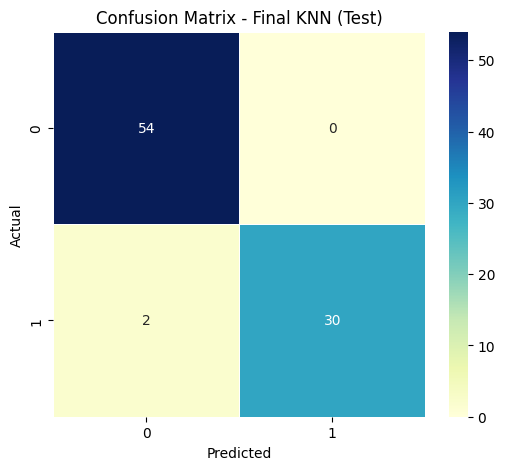

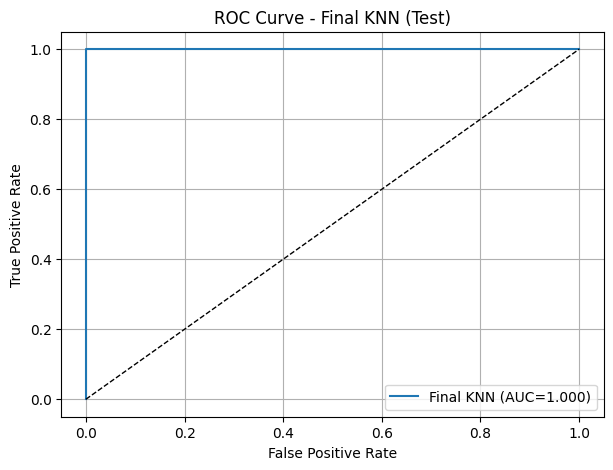

Test Accuracy: 0.9767441860465116
Test Precision: 1.0
Test Recall: 0.9375
Test F1: 0.967741935483871
Test AUC: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Confusion Matrix - Final KNN (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Final KNN (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final KNN (Test)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))
print("Test F1:", f1_score(y_test, y_test_pred))
print("Test AUC:", roc_auc)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


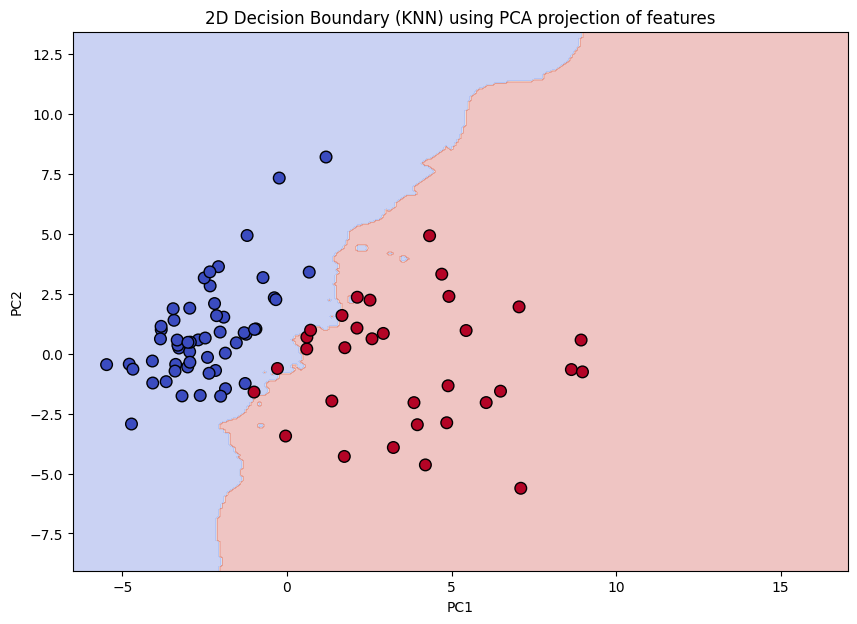

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X_test_processed_for_plot = final_pipe.named_steps['scaler'].transform(
    pd.DataFrame(final_pipe.named_steps['imputer'].transform(X_test), columns=X_test.columns)
)

X_trainval_processed = final_pipe.named_steps['scaler'].transform(
    pd.DataFrame(final_pipe.named_steps['imputer'].transform(X_trainval), columns=X_trainval.columns)
)

pca = PCA(n_components=2, random_state=42)
pca.fit(X_trainval_processed)
X_test_pca = pca.transform(X_test_processed_for_plot)
X_trainval_pca = pca.transform(X_trainval_processed)

knn_vis = KNeighborsClassifier(n_neighbors=final_pipe.named_steps['knn'].n_neighbors,
                               weights=final_pipe.named_steps['knn'].weights,
                               metric=final_pipe.named_steps['knn'].metric,
                               p=final_pipe.named_steps['knn'].p if hasattr(final_pipe.named_steps['knn'],'p') else 2)
knn_vis.fit(X_trainval_pca, y_trainval)

x_min, x_max = X_trainval_pca[:,0].min()-1, X_trainval_pca[:,0].max()+1
y_min, y_max = X_trainval_pca[:,1].min()-1, X_trainval_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn_vis.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='coolwarm', edgecolor='k', s=70)
plt.title("2D Decision Boundary (KNN) using PCA projection of features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:

import joblib
# Save to notebook working dir
joblib.dump(final_pipe, "final_knn_pipeline.pkl")
#print("Saved final pipeline to 'final_knn_pipeline.pkl'. Upload this and your notebook/data.csv to your GitHub repo for submission.")


['final_knn_pipeline.pkl']